In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("ConcatenatedFiles.csv")

In [4]:
dict1 ={"lefkada":"Lefkada","Samons":"Samos"}
df3 = df["Location"].map(dict1)


In [5]:
new_cols = ["name","Location","amount_conv","stars","Rating","NumReviews","Month","size_m2","Pets","Airport","Pool","Breakfast","Family_Rooms","Parking","Restaurant"]
df=df.reindex(columns=new_cols)
df.rename(columns={"name":"Name","amount_conv":"Price(€)","stars":"Stars","NumReviews":"Reviews","size_m2":"Size(m²)","Airport":"AirportShuttle","Family_Rooms":"FamilyRooms"},inplace=True)
df["Reviews"].replace(",",".",inplace=True,regex=True)

In [119]:
df.head()

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
0,Hotel Koukouras,Crete,449.53,NaN,7.6,14,August,26,1,1,1,1,1,1,0,6,106.4,1.175421,23.0- 28.0
1,Kiani Beach Resort Family All Inclusive,Crete,1210.28,NaN,8.2,967,August,35,0,1,0,1,0,1,0,3,7929.4,88.417531,28.0- 35.0
2,Amirandes Grecotel Boutique Resort,Crete,2163.00,5.0,8.9,173,August,31,0,1,0,0,0,1,1,3,1539.7,17.159585,28.0- 35.0
3,La Mer Resort & Spa - Adults Only,Crete,1596.51,5.0,8.7,914,August,23,0,1,0,1,0,0,0,2,7951.8,88.667336,18.0- 23.0
4,Villa Daniela & Apartments,Crete,602.96,5.0,9.5,46,August,45,0,1,0,0,0,1,0,2,437.0,4.862273,40.0- 50.0


In [7]:
df = df[~(df["Reviews"]=="1条住客点评")]
df["Reviews"] = pd.to_numeric(df["Reviews"])

In [8]:
list_for_the_bool = ["Pets","AirportShuttle","Pool","Breakfast","FamilyRooms","Parking","Restaurant"]

for i in list_for_the_bool:
    boolvalues = {True:1,False:0}
    df[i] = df[i].map(boolvalues)
def float_to_int(name):
    df[name].fillna(0,inplace=True)
    df[name]=df[name].astype(int)
    return df
float_to_int("Size(m²)")
float_to_int("Reviews")

df["Facilities_Score"] = df[["Pets","AirportShuttle","Pool","Breakfast","FamilyRooms","Parking","Restaurant"]].sum(axis=1)

In [9]:
df.loc[df["Location"]== "Samons", "Location"] = "Samos"
df.loc[df["Location"]== "lefkada", "Location"] = "Lefkada"

In [10]:
df["Stars"] = df["Stars"].astype("category")
df["Stars"].dtype


CategoricalDtype(categories=[1.0, 2.0, 3.0, 4.0, 5.0], ordered=False)

In [11]:
df["Price(€)"] = df["Price(€)"].round(decimals=2)

In [12]:
df.drop_duplicates(subset=["Name","Month"],inplace = True)

In [13]:
df.shape

(22562, 16)

In [15]:
df.sort_values(by = "Price(€)",ascending=False)

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score
3274,super 1,Mykonos,8988.21,4.0,NaN,0,August,22,1,1,1,0,1,1,0,5
8609,Elegant Santorini Villa Villa Mariniou Private...,Santorini,8963.55,NaN,NaN,0,August,150,0,0,1,0,1,0,0,2
14411,Panasea Villa Naxos,Naxos,8952.08,4.0,9.0,2,July,220,1,1,1,0,0,0,0,3
26107,Beachfront Villa Crystalia,Rhodes,8936.45,NaN,NaN,0,June,400,1,1,1,0,0,1,0,4
16326,"Santorini Secret Suites & Spa, Small Luxury Ho...",Santorini,8934.00,5.0,9.0,120,July,50,0,1,1,0,0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27882,Constantinos Studios,Crete,0.00,NaN,8.8,518,August,0,0,0,0,0,0,0,0,0
15512,The Tower with the Orange tree garden,Rhodes,0.00,NaN,9.1,8,July,0,0,1,0,0,0,1,0,2
8129,Le grand blue,Santorini,0.00,NaN,10.0,7,August,0,0,1,1,0,1,1,0,4
8098,LUX & EASY Caldera Santorini Suites,Santorini,0.00,NaN,NaN,0,August,0,0,0,0,1,1,0,0,2


In [16]:
df["Rating"] = pd.to_numeric(df["Rating"]) 

In [17]:
df["weighted_reviews"] = df["Rating"] * df["Reviews"]

# Then we create the normalized score
df["normalized_weighted_reviews"] = (df["weighted_reviews"] - df["weighted_reviews"].min()) \
                                                / (df["weighted_reviews"].max() - df["weighted_reviews"].min()) * 100


# Which month is the cheapest?

In [18]:
median_months = df.groupby("Month")["Price(€)"].median().reset_index()

In [19]:
median_months

,Month,Price(€)
0,August,789.720
1,July,884.530
2,June,463.585


<Axes: xlabel='Price(€)', ylabel='Month'>

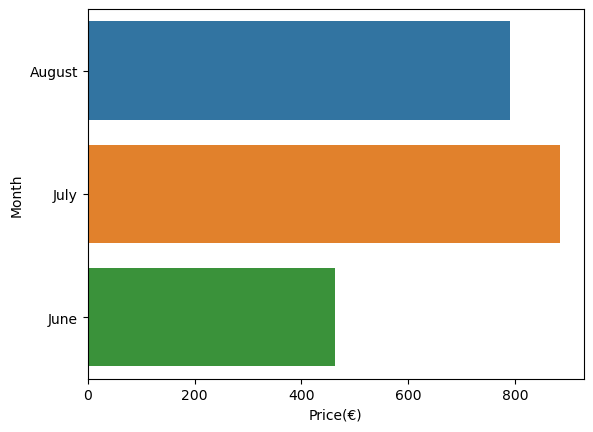

In [20]:
sns.barplot(y = "Month",x = "Price(€)",data = median_months)

In [118]:
months_locs = df.groupby(["Location",'Month'])["Price(€)"].median().reset_index()
months_locs.head(5)

,Location,Month,Price(€)
0,Crete,August,641.12
1,Crete,July,543.51
2,Crete,June,372.00
3,Lefkada,August,751.40
4,Lefkada,July,952.50


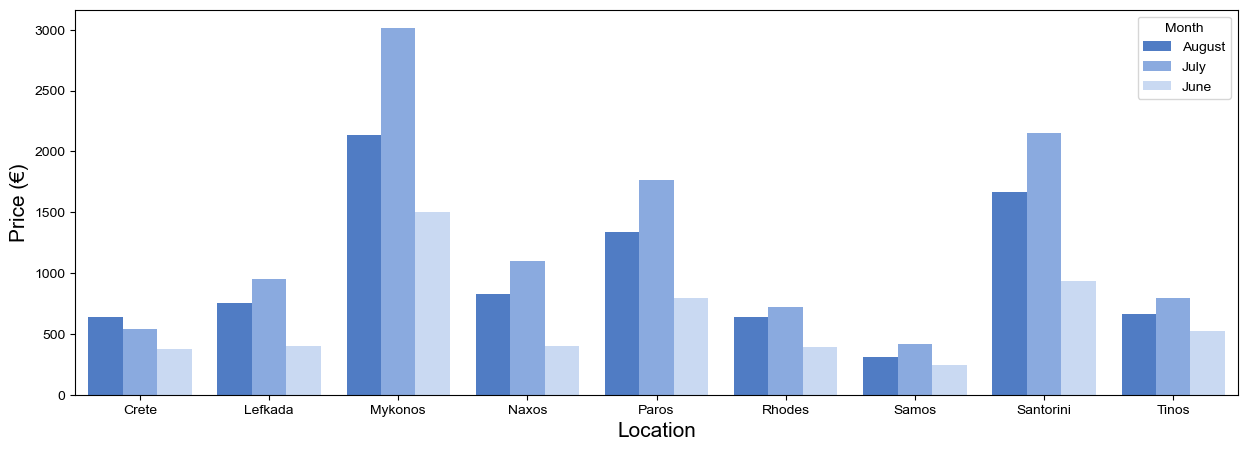

In [22]:
plt.figure(figsize=(15,5))
custom_colors = ["#3c78d8","#7ca7ed","#c2d7f9"]
sns.barplot(x='Location',y = "Price(€)",hue = "Month",data = months_locs,errorbar = None, palette=custom_colors)
sns.set_style("whitegrid")

plt.xlabel("Location", fontsize=15)
plt.ylabel("Price (€)", fontsize=15)
None

In [23]:
df[:2]

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews
0,Hotel Koukouras,Crete,449.53,NaN,7.6,14,August,26,1,1,1,1,1,1,0,6,106.4,1.175421
1,Kiani Beach Resort Family All Inclusive,Crete,1210.28,NaN,8.2,967,August,35,0,1,0,1,0,1,0,3,7929.4,88.417531


### 2.How many hotels allowed pets

In [24]:
df.groupby("Pets")["Name"].count()

Pets
0    16772
1     5790
Name: Name, dtype: int64

In [25]:
PetsDf = df.groupby(["Pets","Location"])["Name"].count().reset_index()
PetsDf

,Pets,Location,Name
0,0,Crete,7281
1,0,Lefkada,1235
2,0,Mykonos,1016
3,0,Naxos,1296
4,0,Paros,780
5,0,Rhodes,2538
6,0,Samos,268
7,0,Santorini,1878
8,0,Tinos,480
9,1,Crete,2439


In [26]:
PetsDf['Pct'] = 100 * PetsDf['Name'] / PetsDf.groupby('Location')['Name'].transform('sum')
PetsDf.sort_values(by="Pct")

,Pets,Location,Name,Pct
14,1,Rhodes,562,18.129032
16,1,Santorini,419,18.241184
9,1,Crete,2439,25.092593
12,1,Naxos,474,26.779661
10,1,Lefkada,474,27.735518
13,1,Paros,362,31.698774
17,1,Tinos,281,36.925099
11,1,Mykonos,595,36.933582
15,1,Samos,184,40.707965
6,0,Samos,268,59.292035


In [27]:
dic={1:"Allowed",
   0:"Not Allowed"}

In [28]:
PetsDf["Pets"]=PetsDf["Pets"].map(dic)

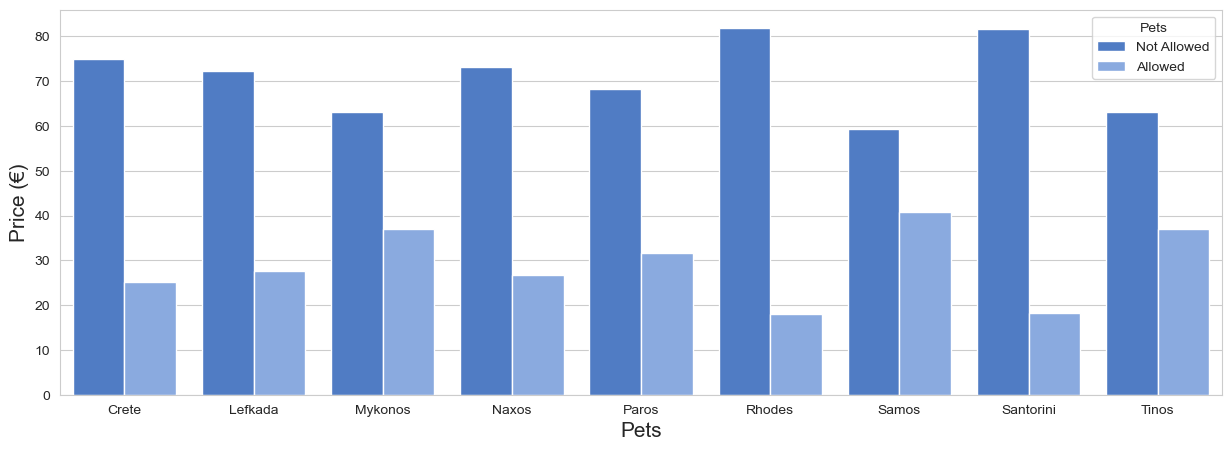

In [29]:
plt.figure(figsize=(15,5))
custom_colors = ["#3c78d8","#7ca7ed"]
sns.barplot(x='Location',y = "Pct",hue ="Pets",data = PetsDf,errorbar = None,palette=custom_colors)
sns.set_style("whitegrid")

plt.xlabel("Pets", fontsize=15)
plt.ylabel("Price (€)", fontsize=15)
None

In [30]:
no_pets_grr =df[df["Pets"]==0]
pets =df[df["Pets"]==1]

In [31]:
no_pets_grr["Stars"].value_counts()

3.0    5343
4.0    3194
5.0     462
2.0     339
1.0      48
Name: Stars, dtype: int64

In [32]:
pets["Stars"].value_counts()

3.0    1943
4.0    1081
5.0     114
2.0     110
1.0      10
Name: Stars, dtype: int64

### 3.The Facilities_Score has some relation with price

In [117]:
df3 = df.groupby("Facilities_Score")["Price(€)"].median().reset_index()
df3

,Facilities_Score,Price(€)
0,0,555.54
1,1,600.00
2,2,627.00
3,3,776.64
4,4,915.89
5,5,907.48
6,6,918.06
7,7,721.50


In [116]:
sample = df[df["Facilities_Score"]==7]
sample[:5]

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
904,Camping Chania,Crete,153.00,NaN,8.0,295,August,15,1,1,1,1,1,1,1,7,2360.0,26.307572,0- 18.0
965,Indigo Inn Casa,Crete,911.00,NaN,8.9,32,August,22,1,1,1,1,1,1,1,7,284.8,3.164938,18.0- 23.0
1694,G George,Lefkada,1123.22,4.0,8.9,232,August,25,1,1,1,1,1,1,1,7,2064.8,23.015501,23.0- 28.0
3456,Halcyon Suites and Villas Naxos,Naxos,1414.80,4.0,9.3,64,August,27,1,1,1,1,1,1,1,7,595.2,6.626519,23.0- 28.0
4192,Selina Paros,Paros,893.46,NaN,7.2,168,August,22,1,1,1,1,1,1,1,7,1209.6,13.478309,18.0- 23.0


In [115]:
x = sample[sample["Location"]=="Crete"]
x.tail()

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews
30590,Mandy Suites,Crete,509.00,4.0,9.1,210,August,38,1,1,1,1,1,1,1,7,1911.0,21.300323
30634,Lazar Lux Suites - Ammoudara,Crete,1034.00,4.0,9.2,223,August,27,1,1,1,1,1,1,1,7,2051.6,22.868295
30936,Pantheon Hotel,Crete,481.31,NaN,7.7,39,August,22,1,1,1,1,1,1,1,7,300.3,3.337794
30944,Hotel Hara Ilios Village,Crete,821.00,4.0,8.6,110,August,30,1,1,1,1,1,1,1,7,946.0,10.538642
31366,Beach Walk Luxury Suites,Crete,774.00,4.0,9.5,20,August,25,1,1,1,1,1,1,1,7,190.0,2.107728


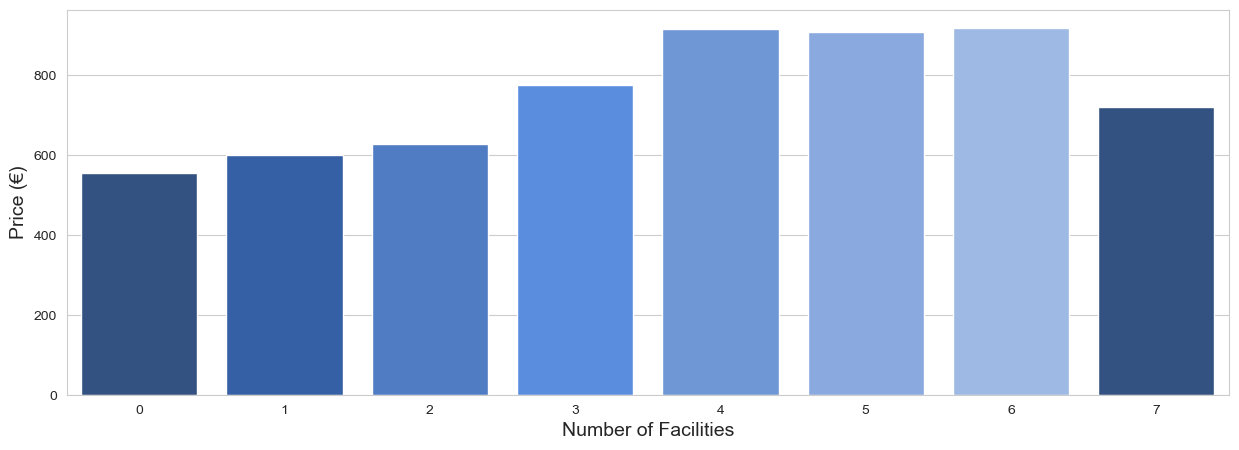

In [36]:
plt.figure(figsize=(15,5))
custom_colors = ["#264e8e", "#235cb8","#3c78d8","#4588f5", "#5f93e6","#7ca7ed","#91b6f0"]
sns.barplot(data=df3,x="Facilities_Score",y="Price(€)",palette=custom_colors)
sns.set_style("whitegrid")

plt.xlabel("Number of Facilities", fontsize=14)
plt.ylabel("Price (€)", fontsize=14)
None

### 4.The stars has relation with price

In [38]:
StarsDf = df.groupby("Stars")["Price(€)"].median().reset_index()
StarsDf

,Stars,Price(€)
0,1.0,323.235
1,2.0,414.000
2,3.0,498.035
3,4.0,1259.720
4,5.0,2060.985


In [39]:
StarsDf["Stars"].corr(StarsDf["Price(€)"])

0.9198067213831452

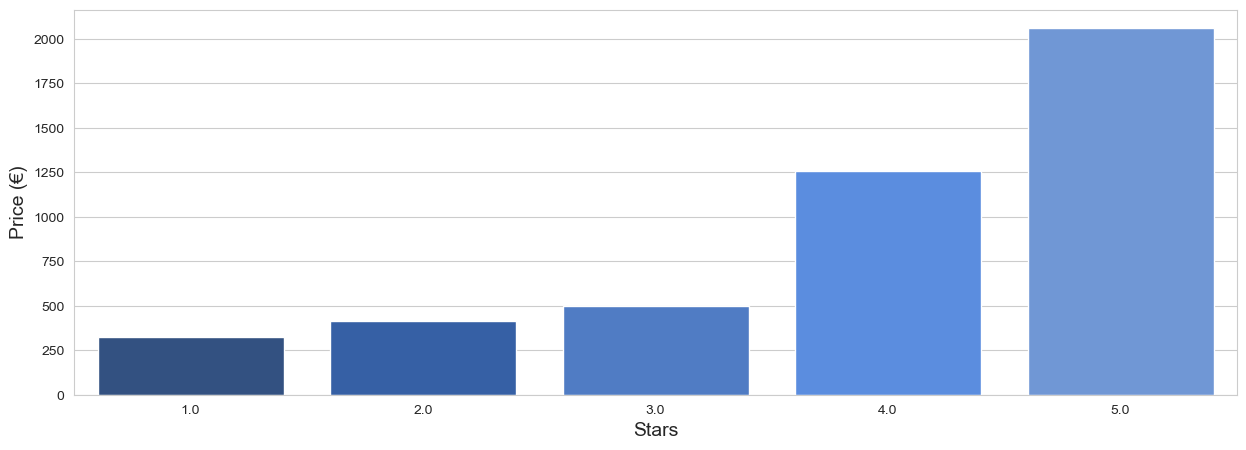

In [40]:
plt.figure(figsize=(15,5))
custom_colors = ["#264e8e", "#235cb8","#3c78d8","#4588f5", "#5f93e6","#7ca7ed","#91b6f0"]
sns.barplot(data=StarsDf,x="Stars",y="Price(€)",palette=custom_colors)
sns.set_style("whitegrid")

plt.xlabel("Stars", fontsize=14)
plt.ylabel("Price (€)", fontsize=14)
None


### 5.In which area has the most  5 star hotels

### 5.1 The distribution of Stars for Location

In [41]:
AreaStarDf = df.groupby(["Location","Stars"])["Name"].count().reset_index()
AreaStarDf.head(5)

,Location,Stars,Name
0,Crete,1.0,17
1,Crete,2.0,207
2,Crete,3.0,3607
3,Crete,4.0,1721
4,Crete,5.0,230


In [42]:
AreaStarDf[AreaStarDf["Stars"]==5].sort_values(by="Name", ascending = False) ### .In which area has the most 5 star hotels

,Location,Stars,Name
4,Crete,5.0,230
39,Santorini,5.0,108
14,Mykonos,5.0,107
29,Rhodes,5.0,107
24,Paros,5.0,17
34,Samos,5.0,4
19,Naxos,5.0,2
9,Lefkada,5.0,1
44,Tinos,5.0,0


In [43]:
AreaStarDf['Pct'] = 100 * AreaStarDf['Name'] / AreaStarDf.groupby('Location')['Name'].transform('sum')
AreaStarDf[:3]

,Location,Stars,Name,Pct
0,Crete,1.0,17,0.294016
1,Crete,2.0,207,3.580076
2,Crete,3.0,3607,62.383258


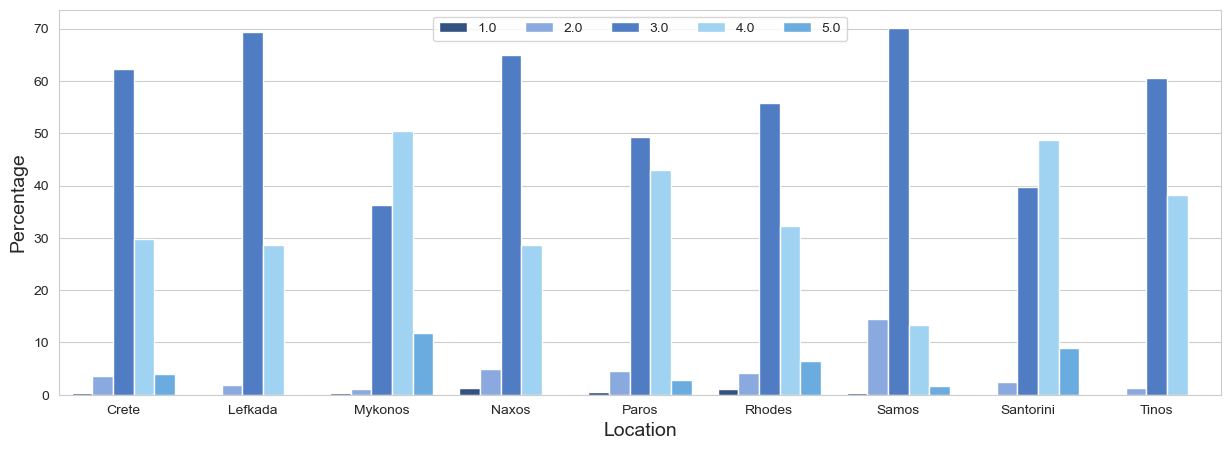

In [44]:
plt.figure(figsize=(15,5))
sns.set_style("whitegrid")
custom_colors = ["#264e8e","#7ca7ed","#3c78d8","#92d7fe","#57aff3"]

sns.barplot(x='Location',y = "Pct",hue ="Stars",data = AreaStarDf,errorbar = None,palette=custom_colors)
plt.legend(loc='upper center',ncol=len(df.columns))
plt.xlabel("Location", fontsize=14)
plt.ylabel("Percentage", fontsize=14)

None

### 6.In which area has the most  normalized_weighted_reviews

The Top Ten Hotels regarding with booking

In [45]:
df.sort_values(by="normalized_weighted_reviews", ascending=False).head(10)

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews
774,White Swan,Crete,776.64,NaN,9.5,944,August,27,0,1,1,0,1,1,0,4,8968.0,100.000000
7973,Anemoessa Villa,Santorini,1279.88,4.0,9.4,951,August,30,0,0,1,1,0,0,0,2,8939.4,99.681053
10196,Gregory Comfort Hotel,Crete,0.00,3.0,8.9,996,July,0,0,1,0,1,1,1,1,5,8864.4,98.844653
20260,Gregory Comfort Hotel,Crete,0.00,3.0,8.9,996,August,0,0,1,0,1,1,1,1,5,8864.4,98.844653
17578,Gregory Comfort Hotel,Crete,0.00,3.0,8.9,991,June,0,0,1,0,1,1,1,1,5,8819.9,98.348389
6624,Artemis Village,Santorini,579.24,3.0,8.9,990,August,25,0,1,1,0,1,1,0,4,8811.0,98.249136
7913,Santorini Kastelli Resort,Santorini,0.00,5.0,9.4,916,August,0,0,1,1,0,1,1,1,5,8610.4,96.012044
29897,City Lion by Semavi,Crete,878.47,4.0,9.8,875,August,57,0,0,0,0,1,1,0,2,8575.0,95.617263
2513,Damianos Mykonos Hotel,Mykonos,1578.50,NaN,9.6,884,August,14,0,1,1,1,0,1,1,5,8486.4,94.629196
9147,Stella Island Luxury Resort & Spa (Adults Only),Crete,5703.20,5.0,9.4,900,July,35,0,1,0,0,0,1,1,3,8460.0,94.334783


In [46]:
agg_func_math = {
    'normalized_weighted_reviews':['mean', 'median', "sum","max"]}

df.groupby("Location").agg(agg_func_math)

normalized_weighted_reviews                                     
                                 mean     median           sum         max
Location                                                                  
Crete                        8.601045   2.470168  66339.860600  100.000000
Lefkada                      4.913284   1.973904   6686.980038   78.400803
Mykonos                     12.857683   5.979703  16483.549682   94.629196
Naxos                        6.051897   2.789116   8539.227166   78.130925
Paros                        8.445324   2.330768   6410.001115   90.791792
Rhodes                       8.608529   2.414408  20720.729341   92.731125
Samos                        3.912949   2.163488   1408.661760   43.791681
Santorini                   16.114521  10.047954  32100.124902   99.681053
Tinos                        4.081066   1.092896   2191.532285   73.464927

In [114]:
df.sort_values(by="normalized_weighted_reviews", ascending=True)[:3]

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
14059,Villa Anemos Sea view of Mykonos,Mykonos,7835.42,4.0,1.0,1,July,237,0,1,1,0,0,1,0,3,1.0,0.0,120.0- 2000
495,Artemis Casa di Boheme Chania,Crete,455.00,NaN,1.0,1,August,60,0,0,0,0,0,1,0,1,1.0,0.0,50.0- 65.0
388,TROCHALOS,Crete,271.03,NaN,1.0,1,August,30,0,0,0,0,0,0,0,0,1.0,0.0,28.0- 35.0


### 7.The pool has some relation with the price

In [48]:
PoolGroup = df.groupby("Pool")["Price(€)"].mean().reset_index()
PoolGroup

,Pool,Price(€)
0,0,883.115443
1,1,1678.981028


In [49]:
PoolGroup["Pool"].corr(PoolGroup["Price(€)"])

0.9999999999999998

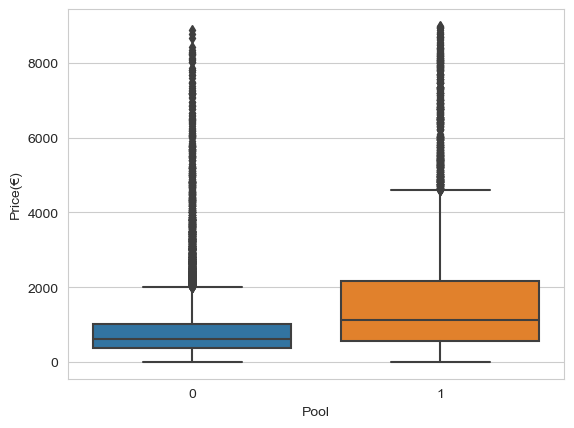

In [50]:
sns.boxplot( x=df["Pool"], y=df["Price(€)"])
None

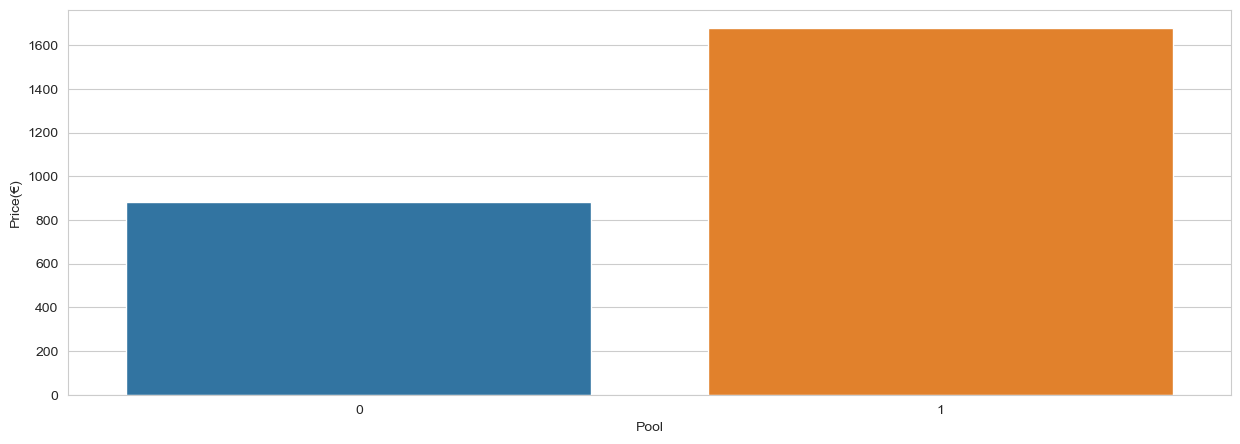

In [51]:
plt.figure(figsize=(15,5))
sns.barplot(x='Pool',y = "Price(€)",data = PoolGroup,errorbar = None)
None

### 8.The Pets has some relation with the price

In [52]:
PetsGroup = df.groupby("Pets")["Price(€)"].mean().reset_index()
PetsGroup

,Pets,Price(€)
0,0,1109.418331
1,1,1187.841686


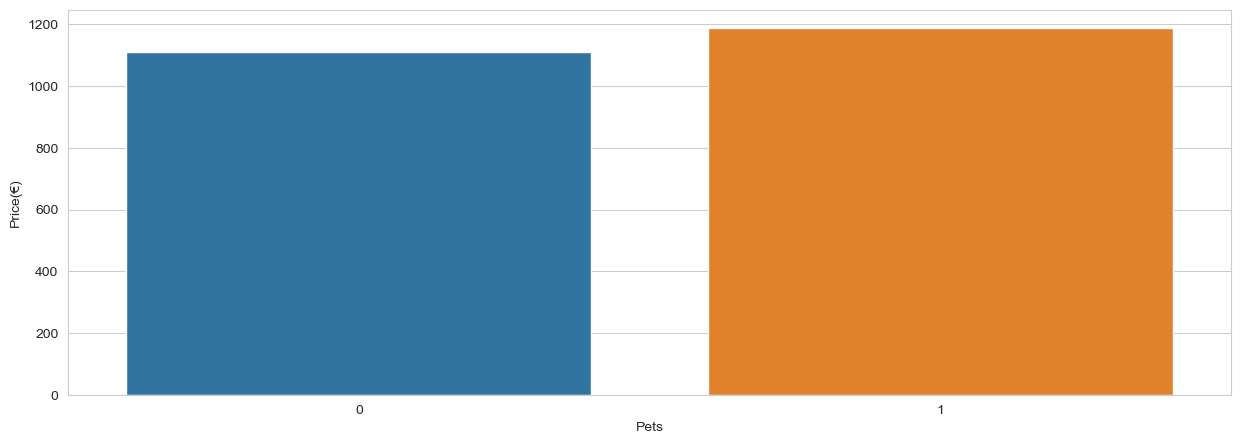

In [53]:
plt.figure(figsize=(15,5))
sns.barplot(x='Pets',y = "Price(€)",data = PetsGroup,errorbar = None)
None

### 9.The AirportShuttle has some relation with the price

In [54]:
AirportShuttleGroup = df.groupby("AirportShuttle")["Price(€)"].mean().reset_index()
AirportShuttleGroup

,AirportShuttle,Price(€)
0,0,934.033111
1,1,1437.584772


In [55]:
AirportShuttleGroup["AirportShuttle"].corr(AirportShuttleGroup["Price(€)"])

1.0

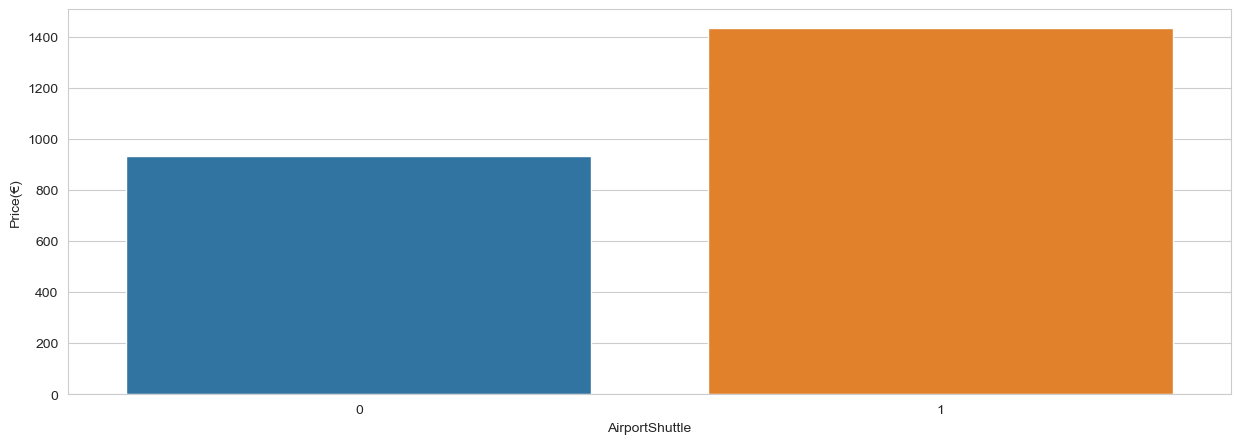

In [56]:
plt.figure(figsize=(15,5))
sns.barplot(x='AirportShuttle',y = "Price(€)",data = AirportShuttleGroup,errorbar = None)
None

### 10.The Breakfast has some relation with the price

In [57]:
BreakfastGroup = df.groupby("Breakfast")["Price(€)"].mean().reset_index()
BreakfastGroup

,Breakfast,Price(€)
0,0,1095.544882
1,1,1269.250491


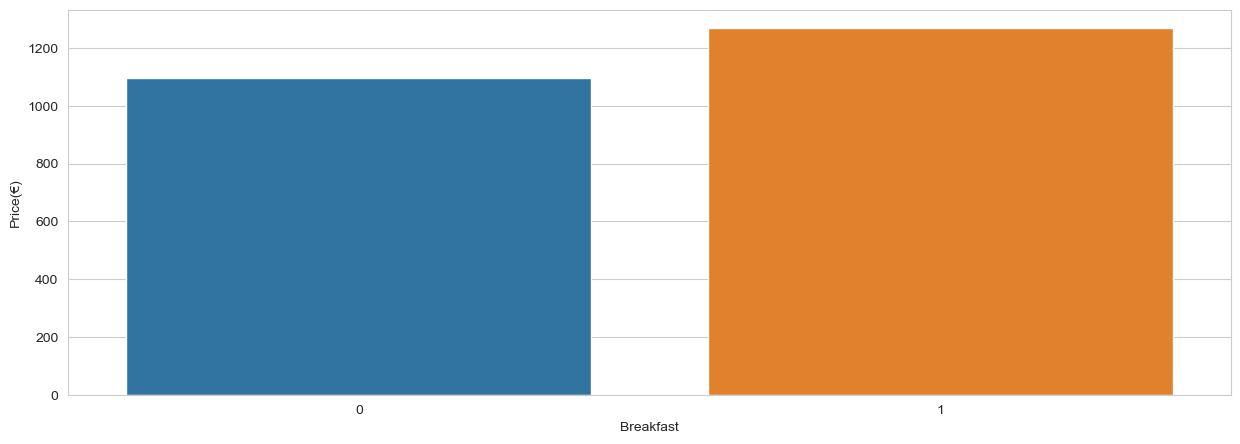

In [58]:
plt.figure(figsize=(15,5))
sns.barplot(x='Breakfast',y = "Price(€)",data = BreakfastGroup,errorbar = None)
None

### 11.The FamilyRooms has some relation with the price

In [59]:
FamilyRoomsGroup = df.groupby("FamilyRooms")["Price(€)"].mean().reset_index()
FamilyRoomsGroup

,FamilyRooms,Price(€)
0,0,1244.419587
1,1,1046.886844


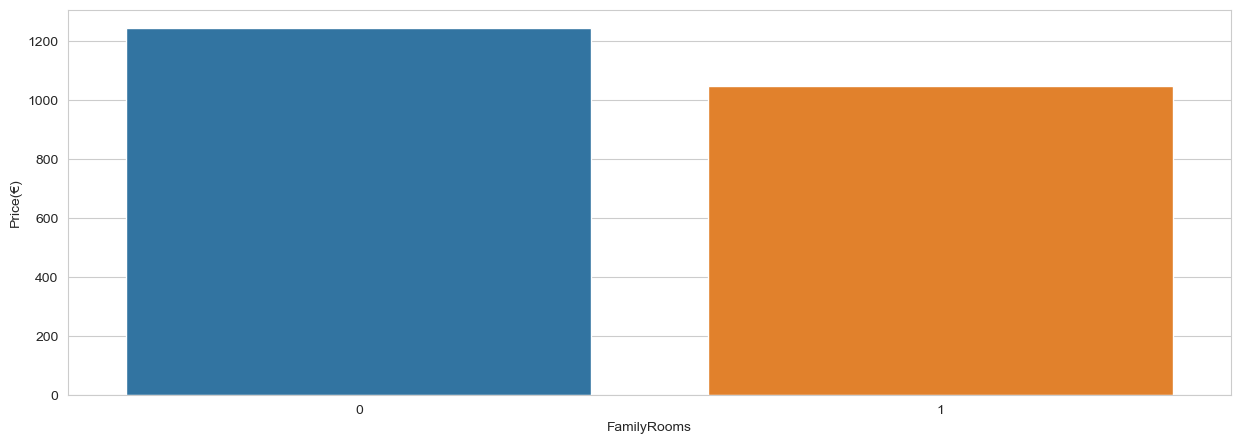

In [60]:
plt.figure(figsize=(15,5))
sns.barplot(x='FamilyRooms',y = "Price(€)",data = FamilyRoomsGroup,errorbar = None)
None

### 12.The Parking has some relation with the price

In [61]:
ParkingGroup = df.groupby("Parking")["Price(€)"].mean().reset_index()
ParkingGroup

,Parking,Price(€)
0,0,1121.681226
1,1,1131.589944


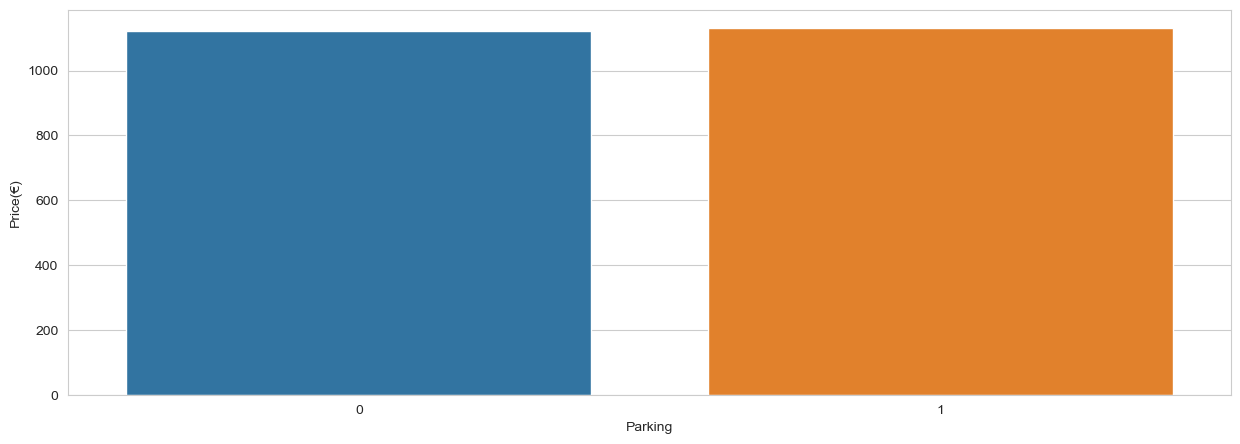

In [62]:
plt.figure(figsize=(15,5))
sns.barplot(x='Parking',y = "Price(€)",data = ParkingGroup,errorbar = None)
None

### 13.The Restaurant has some relation with the price

In [63]:
RestaurantGroup = df.groupby("Restaurant")["Price(€)"].mean().reset_index()
RestaurantGroup

,Restaurant,Price(€)
0,0,1112.679286
1,1,1251.445715


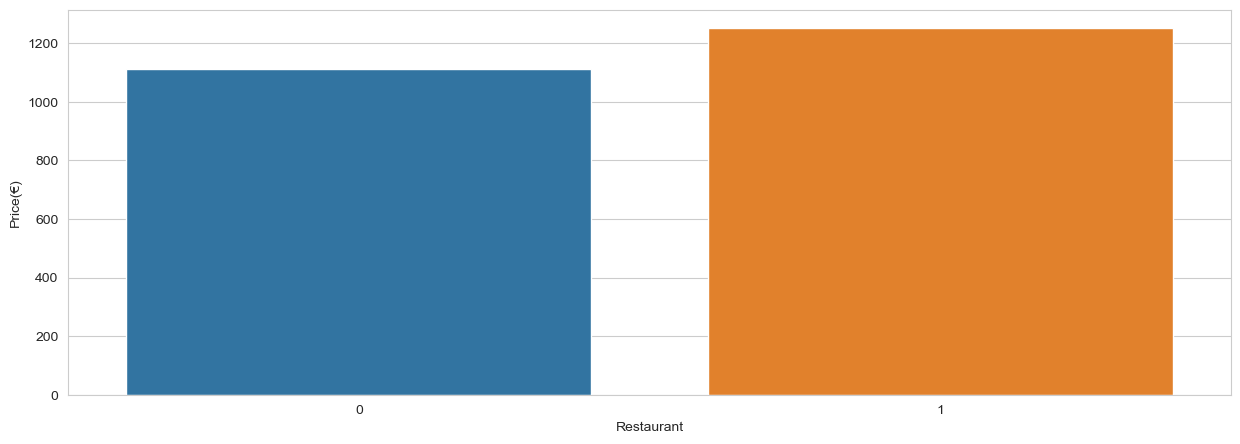

In [64]:
plt.figure(figsize=(15,5))
sns.barplot(x='Restaurant',y = "Price(€)",data = RestaurantGroup,errorbar = None)
None

### 14.The Size(m²) has some relation with price

In [65]:
SizemGroup = df.groupby("Size(m²)")["Price(€)"].mean().reset_index()


In [66]:
df["Size(m²)"].corr(df["Price(€)"])

0.426320007405128

In [67]:
list_intervals = []
starting_q = 0.1
for elem in df:
    if elem  == "Size(m²)":
        for x in range(1,10+1):
            list_intervals.append((df[elem].quantile(q = starting_q )))
            starting_q+=0.1
            
        

In [68]:
list_intervals

[18.0, 23.0, 28.0, 35.0, 40.0, 50.0, 65.0, 87.0, 120.0, 1999.9999999969805]

In [69]:
list_intervals_final = []
    
for i in range(len(list_intervals) - 1):
    x = list_intervals[i]
    next_x = list_intervals[i + 1]
    list_intervals_final.append(f"{x}, {next_x}")

In [70]:
list_intervals_final

['18.0, 23.0',
 '23.0, 28.0',
 '28.0, 35.0',
 '35.0, 40.0',
 '40.0, 50.0',
 '50.0, 65.0',
 '65.0, 87.0',
 '87.0, 120.0',
 '120.0, 1999.9999999969805']

In [71]:
#list_intervals_final Modifications

list_intervals_final = ['0, 18.0','18.0, 23.0',
 '23.0, 28.0',
 '28.0, 35.0',
 '35.0, 40.0',
 '40.0, 50.0',
 '50.0, 65.0',
 '65.0, 87.0',
 '87.0, 120.0',
 '120.0, 2000']

In [72]:
list_intervals_final = [interval.replace(',', '-') for interval in list_intervals_final]

In [73]:
list_intervals_final

['0- 18.0',
 '18.0- 23.0',
 '23.0- 28.0',
 '28.0- 35.0',
 '35.0- 40.0',
 '40.0- 50.0',
 '50.0- 65.0',
 '65.0- 87.0',
 '87.0- 120.0',
 '120.0- 2000']

In [74]:
df["m²_Intervals"] = pd.qcut(df['Size(m²)'], 10, labels=list_intervals_final)

In [75]:
Bins_Sizes = df.groupby("m²_Intervals").agg({"Name":"count","Price(€)":"median"}).reset_index()


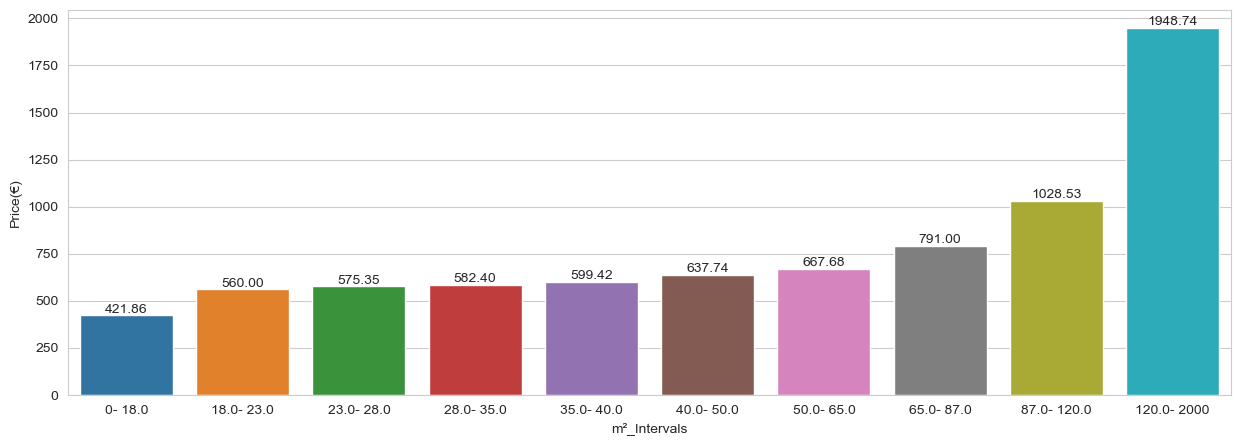

In [76]:

plt.figure(figsize=(15,5))
ax = sns.barplot(x="m²_Intervals", y="Price(€)", data=Bins_Sizes, errorbar=None)
None
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

### 16 A new Df with FamilyRooms and give some EDA and some suggestion

In [77]:
Family = df[df["FamilyRooms"]==1]

In [78]:
df_family=df.groupby(["FamilyRooms","Location"])["Name"].count().reset_index()


In [79]:
df_family

,FamilyRooms,Location,Name
0,0,Crete,3767
1,0,Lefkada,689
2,0,Mykonos,801
3,0,Naxos,561
4,0,Paros,522
5,0,Rhodes,1551
6,0,Samos,189
7,0,Santorini,1072
8,0,Tinos,289
9,1,Crete,5953


In [80]:
df_family['Pct'] = 100 * df_family['Name'] / df_family.groupby('Location')['Name'].transform('sum')

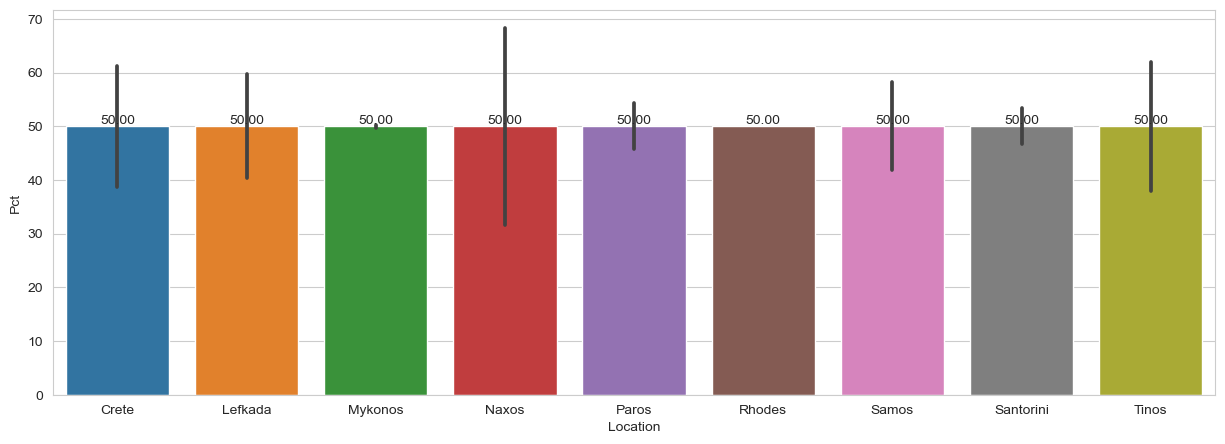

In [81]:
plt.figure(figsize=(15,5))

ax = sns.barplot(data = df_family,x = "Location",y = "Pct")
None
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

In [82]:
df.head(2)

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
0,Hotel Koukouras,Crete,449.53,NaN,7.6,14,August,26,1,1,1,1,1,1,0,6,106.4,1.175421,23.0- 28.0
1,Kiani Beach Resort Family All Inclusive,Crete,1210.28,NaN,8.2,967,August,35,0,1,0,1,0,1,0,3,7929.4,88.417531,28.0- 35.0


## 17.To filter Facilities_Score=7 to watch and pick the top 20s from each location moreover found how many is in each location,and maqybe the percentage from other

In [83]:
df_7_facilities_score = df[df["Facilities_Score"]==7]
df_7_facilities_score

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
904,Camping Chania,Crete,153.00,NaN,8.0,295,August,15,1,1,1,1,1,1,1,7,2360.0,26.307572,0- 18.0
965,Indigo Inn Casa,Crete,911.00,NaN,8.9,32,August,22,1,1,1,1,1,1,1,7,284.8,3.164938,18.0- 23.0
1694,G George,Lefkada,1123.22,4.0,8.9,232,August,25,1,1,1,1,1,1,1,7,2064.8,23.015501,23.0- 28.0
3456,Halcyon Suites and Villas Naxos,Naxos,1414.80,4.0,9.3,64,August,27,1,1,1,1,1,1,1,7,595.2,6.626519,23.0- 28.0
4192,Selina Paros,Paros,893.46,NaN,7.2,168,August,22,1,1,1,1,1,1,1,7,1209.6,13.478309,18.0- 23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30590,Mandy Suites,Crete,509.00,4.0,9.1,210,August,38,1,1,1,1,1,1,1,7,1911.0,21.300323,35.0- 40.0
30634,Lazar Lux Suites - Ammoudara,Crete,1034.00,4.0,9.2,223,August,27,1,1,1,1,1,1,1,7,2051.6,22.868295,23.0- 28.0
30936,Pantheon Hotel,Crete,481.31,NaN,7.7,39,August,22,1,1,1,1,1,1,1,7,300.3,3.337794,18.0- 23.0
30944,Hotel Hara Ilios Village,Crete,821.00,4.0,8.6,110,August,30,1,1,1,1,1,1,1,7,946.0,10.538642,28.0- 35.0


In [84]:
df_7_facilities_score.groupby("Location")["Price(€)"].median()

Location
Crete         530.84
Lefkada      1123.22
Mykonos      3523.55
Naxos        1414.80
Paros         893.46
Rhodes        438.00
Santorini    1468.35
Name: Price(€), dtype: float64

In [85]:
df_7_facilities_score.groupby("Location").count()

,Name,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
Location,,,,,,,,,,,,,,,,,,
Crete,36,36,20,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36
Lefkada,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Mykonos,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Naxos,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
Paros,3,3,1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Rhodes,8,8,5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
Santorini,8,8,4,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


In [86]:
#Crete got the biggest count of 7_facilities score,the best prices though

## 19.What hotel has the biggest normalized_weighted_reviews

In [87]:
df_19 = df[df["Price(€)"]>0]

In [88]:
df_19.sort_values(by = "normalized_weighted_reviews",ascending=False).head(10)

,Name,Location,Price(€),Stars,Rating,Reviews,Month,Size(m²),Pets,AirportShuttle,Pool,Breakfast,FamilyRooms,Parking,Restaurant,Facilities_Score,weighted_reviews,normalized_weighted_reviews,m²_Intervals
774,White Swan,Crete,776.64,NaN,9.5,944,August,27,0,1,1,0,1,1,0,4,8968.0,100.000000,23.0- 28.0
7973,Anemoessa Villa,Santorini,1279.88,4.0,9.4,951,August,30,0,0,1,1,0,0,0,2,8939.4,99.681053,28.0- 35.0
6624,Artemis Village,Santorini,579.24,3.0,8.9,990,August,25,0,1,1,0,1,1,0,4,8811.0,98.249136,23.0- 28.0
29897,City Lion by Semavi,Crete,878.47,4.0,9.8,875,August,57,0,0,0,0,1,1,0,2,8575.0,95.617263,50.0- 65.0
2513,Damianos Mykonos Hotel,Mykonos,1578.50,NaN,9.6,884,August,14,0,1,1,1,0,1,1,5,8486.4,94.629196,0- 18.0
9147,Stella Island Luxury Resort & Spa (Adults Only),Crete,5703.20,5.0,9.4,900,July,35,0,1,0,0,0,1,1,3,8460.0,94.334783,28.0- 35.0
21957,Stella Island Luxury Resort & Spa (Adults Only),Crete,4393.05,5.0,9.4,899,June,35,0,1,0,0,0,1,1,3,8450.6,94.229954,28.0- 35.0
8251,Sweet Pop,Santorini,1202.80,NaN,9.1,926,August,17,0,1,1,0,0,0,0,2,8426.6,93.962306,0- 18.0
9128,Royal Marmin Bay Boutique & Art Hotel,Crete,1704.67,NaN,9.1,921,July,23,0,1,1,0,0,1,0,3,8381.1,93.454890,18.0- 23.0
9,Royal Marmin Bay Boutique & Art Hotel,Crete,1254.34,5.0,9.1,921,August,20,0,1,1,0,0,1,1,4,8381.1,93.454890,18.0- 23.0


In [89]:
result_df  = df_19.groupby(["Location"])[["normalized_weighted_reviews"]].max().reset_index().sort_values(by = "normalized_weighted_reviews",ascending=False)

In [90]:
merged_df = pd.merge(result_df, df_19[["Location", "normalized_weighted_reviews", "Name","Price(€)"]], on=["Location", "normalized_weighted_reviews"], how="left")

In [91]:
merged_df

,Location,normalized_weighted_reviews,Name,Price(€)
0,Crete,100.000000,White Swan,776.64
1,Santorini,99.681053,Anemoessa Villa,1279.88
2,Mykonos,94.629196,Damianos Mykonos Hotel,1578.50
3,Rhodes,92.731125,Lefka Hotel & Apartments,668.22
4,Lefkada,78.400803,Porto Galini Seaside Resort & Spa,1151.39
5,Naxos,78.130925,Spiros,1393.46
6,Paros,74.040370,Akrotiri Hotel,1152.34
7,Tinos,67.529832,Venus Minimal Hotel,320.56
8,Samos,43.791681,Samos Bay Hotel by Gagou Beach,315.28


# # 20.How many hotels with Facilities_Score=7 whch has the top 5 normalized_weighted_reviews


In [92]:
merged_df.head(5)

,Location,normalized_weighted_reviews,Name,Price(€)
0,Crete,100.000000,White Swan,776.64
1,Santorini,99.681053,Anemoessa Villa,1279.88
2,Mykonos,94.629196,Damianos Mykonos Hotel,1578.50
3,Rhodes,92.731125,Lefka Hotel & Apartments,668.22
4,Lefkada,78.400803,Porto Galini Seaside Resort & Spa,1151.39


In [93]:
df_20 = df.groupby("Pool")["normalized_weighted_reviews"].median().reset_index()

In [94]:
d = {0:"No",1:"Yes"}
df_20["Pool"] = df_20["Pool"].map(d)
df_20

,Pool,normalized_weighted_reviews
0,No,2.152336
1,Yes,5.844764


## 21.If has some relation between Pool and normalized_weighted_reviews

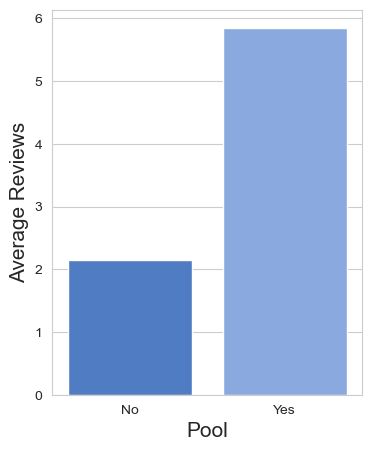

In [95]:
plt.figure(figsize=(4,5))
sns.set_style("whitegrid")
custom_colors = ["#3c78d8","#7ca7ed"]
sns.barplot(x='Pool',y = "normalized_weighted_reviews",data = df_20,errorbar = None, palette=custom_colors)
plt.xlabel("Pool", fontsize=15)
plt.ylabel("Average Reviews", fontsize=15)
None

In [96]:
df_22 = df.groupby("Pets")["normalized_weighted_reviews"].median().reset_index()

In [97]:
df_22

,Pets,normalized_weighted_reviews
0,0,3.060109
1,1,2.414408


In [98]:
d = {0:"No",1:"Yes"}
df_22["Pets"] = df_22["Pets"].map(d)
df_22

,Pets,normalized_weighted_reviews
0,No,3.060109
1,Yes,2.414408


## 22.If has some relation between Pets and normalized_weighted_reviews

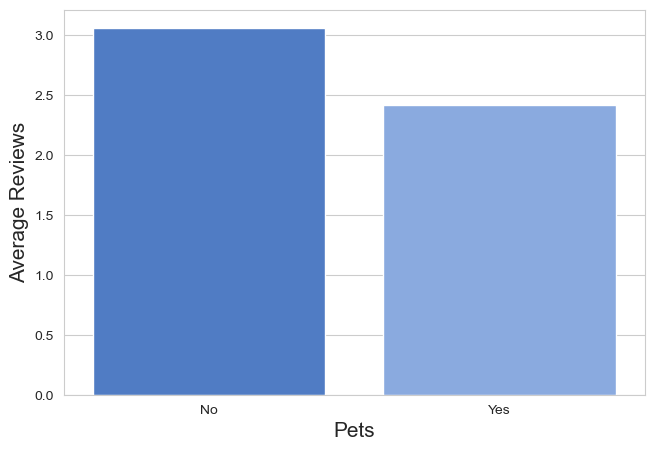

In [99]:
plt.figure(figsize=(7.5,5))
custom_colors = ["#3c78d8","#7ca7ed"]
sns.barplot(x='Pets',y = "normalized_weighted_reviews",data = df_22,errorbar = None, palette=custom_colors)
plt.xlabel("Pets", fontsize=15)
plt.ylabel("Average Reviews", fontsize=15)
None

In [100]:
Hotels without pets Allowed tend to have better reviews than Hotels with pets allowed

SyntaxError: invalid syntax (514916641.py, line 1)

In [101]:
df_23 = df.groupby("AirportShuttle")["normalized_weighted_reviews"].median().reset_index()

In [102]:
d = {0:"No",1:"Yes"}
df_23["AirportShuttle"] = df_23["AirportShuttle"].map(d)
df_23

,AirportShuttle,normalized_weighted_reviews
0,No,1.751979
1,Yes,5.810193


## 23.If has some relation between AirportShuttle and normalized_weighted_reviews

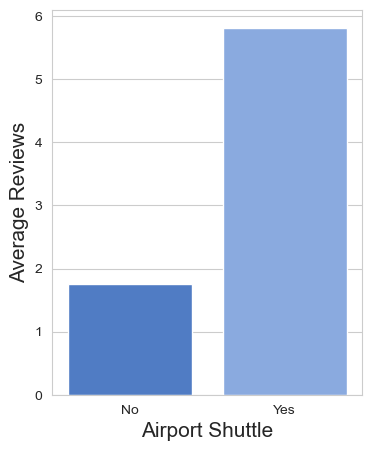

In [103]:

sns.set_style("whitegrid")
plt.figure(figsize=(4,5))
custom_colors = ["#3c78d8","#7ca7ed"]
sns.barplot(x='AirportShuttle',y = "normalized_weighted_reviews",data = df_23,errorbar = None, palette=custom_colors)

plt.xlabel("Airport Shuttle", fontsize=15)
plt.ylabel("Average Reviews", fontsize=15)

None


## 24.If has some relation between FamilyRooms and normalized_weighted_reviews

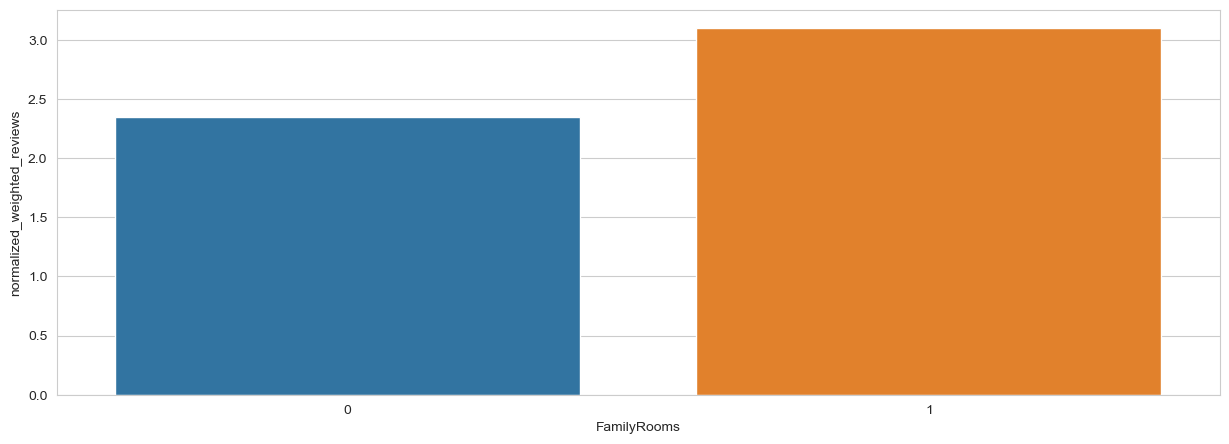

In [104]:
df_24 = df.groupby("FamilyRooms")["normalized_weighted_reviews"].median().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='FamilyRooms',y = "normalized_weighted_reviews",data = df_24,errorbar = None)
None


In [105]:
df_24

,FamilyRooms,normalized_weighted_reviews
0,0,2.348612
1,1,3.100256


## 25.If has some relation between Facilities_Score and normalized_weighted_reviews

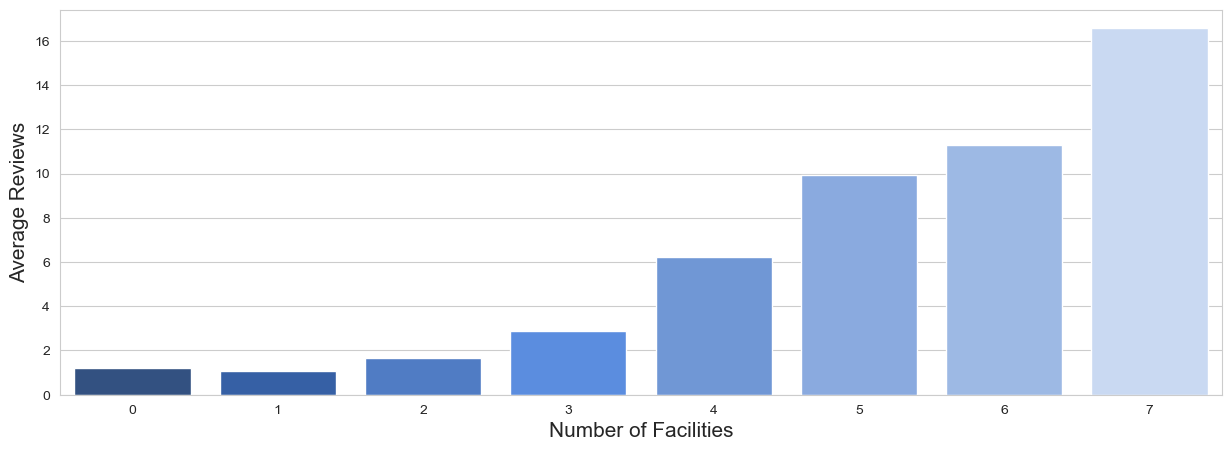

In [106]:
df_25 = df.groupby("Facilities_Score")["normalized_weighted_reviews"].median().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(15,5))
custom_colors = ["#264e8e", "#235cb8","#3c78d8","#4588f5", "#5f93e6","#7ca7ed","#91b6f0","#c2d7f9"]

sns.barplot(x='Facilities_Score',y = "normalized_weighted_reviews",data = df_25,errorbar = None, palette=custom_colors)
plt.xlabel("Number of Facilities", fontsize=15)
plt.ylabel("Average Reviews", fontsize=15)

None



## 26.If has some relation between Size(m²) and normalized_weighted_reviews


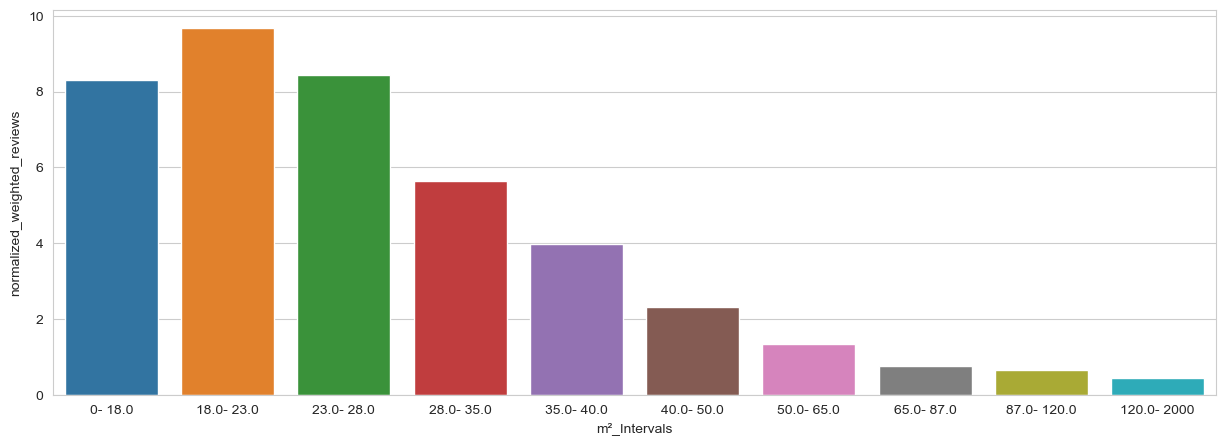

In [107]:
df_26 = df.groupby("m²_Intervals")["normalized_weighted_reviews"].median().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='m²_Intervals',y = "normalized_weighted_reviews",data = df_26,errorbar = None)
None


In [108]:
x = df.to_excel("ConcatenatedFiles_forBI2.xlsx", index=False)